In [70]:
from lightgbm import LGBMClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV

In [169]:
y_train = train_df.pop('label')
x_train = train_df.drop(columns = ['Timestamp', 'Arbitration_ID'])

In [170]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.01, random_state=123)
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5, random_state=123)

In [171]:
lgb = LGBMClassifier(learning_rate = 0.2,
                    n_estimators = 2500,
                    objective = 'binary',
                    subsample=0.75,
                    subsample_freq = 1,
                    reg_alpha = 1.2,
                    reg_lambda = 1.4)
lgb.fit(X_train, Y_train,
        early_stopping_rounds = 100,
        eval_set = [(X_train, Y_train), (X_val, Y_val)])

[1]	training's binary_logloss: 0.145543	valid_1's binary_logloss: 0.145914
Training until validation scores don't improve for 100 rounds
[2]	training's binary_logloss: 0.115047	valid_1's binary_logloss: 0.116085
[3]	training's binary_logloss: 0.0946565	valid_1's binary_logloss: 0.095451
[4]	training's binary_logloss: 0.080016	valid_1's binary_logloss: 0.0805839
[5]	training's binary_logloss: 0.0689236	valid_1's binary_logloss: 0.0694276
[6]	training's binary_logloss: 0.0597133	valid_1's binary_logloss: 0.060105
[7]	training's binary_logloss: 0.0525229	valid_1's binary_logloss: 0.0526963
[8]	training's binary_logloss: 0.0462211	valid_1's binary_logloss: 0.0465476
[9]	training's binary_logloss: 0.0412714	valid_1's binary_logloss: 0.0416943
[10]	training's binary_logloss: 0.0372544	valid_1's binary_logloss: 0.0375388
[11]	training's binary_logloss: 0.034003	valid_1's binary_logloss: 0.0342123
[12]	training's binary_logloss: 0.03066	valid_1's binary_logloss: 0.0309853
[13]	training's binar

LGBMClassifier(learning_rate=0.2, n_estimators=2500, objective='binary',
               reg_alpha=1.2, reg_lambda=1.4, subsample=0.75, subsample_freq=1)

### Feature Importance Check

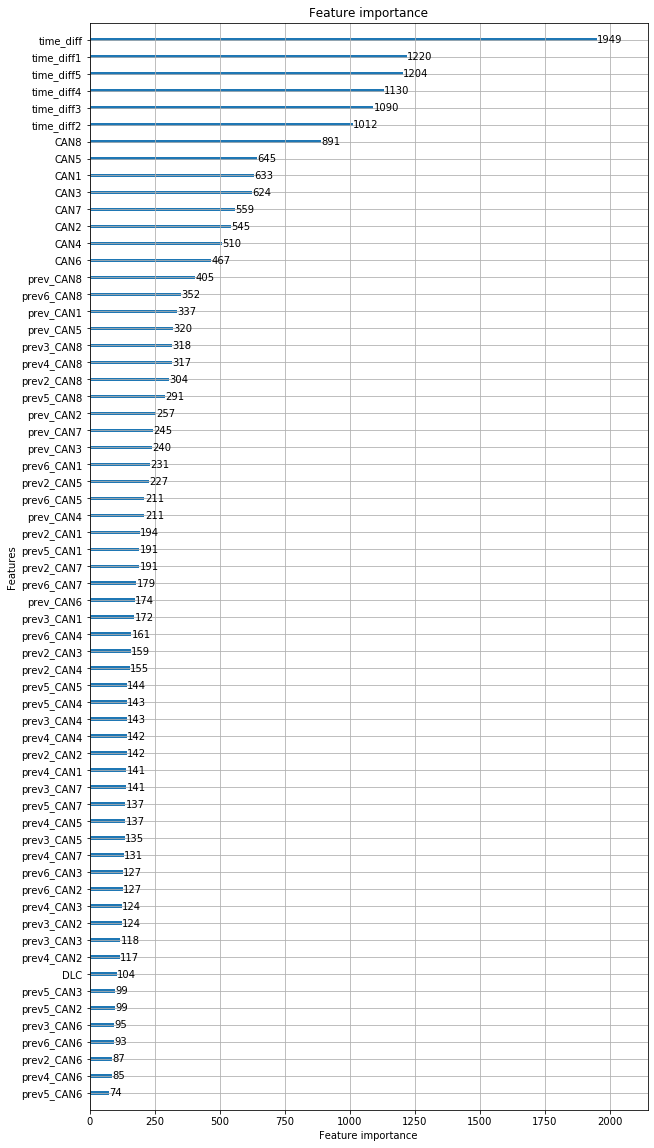

In [172]:
fig, ax = plt.subplots(figsize=(10,20))
plot_importance(lgb,ax=ax)

#### Result

In [144]:
y_pred = lgb.predict(X_test)
print(accuracy_score(Y_test, y_pred))
precision, recall, fbeta_score, _ = precision_recall_fscore_support(Y_test, y_pred, average = 'binary')
print(precision, recall, fbeta_score)

0.9996187571483035
0.998638529611981 0.9966032608695652 0.9976198571914315
